Homework 4: Sentiment Analysis - Task 4
----

Names & Sections
----
Names: Julia Geller (4120) and Shae Marks (4120)

Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [1]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later

In [3]:
# split the train and development tuples into X and y
X_train, y_train = train_tups

X_dev, y_dev = dev_tups

In [4]:
# un-tokenize reviews to let CountVectorizer find the vocab itself 
X_train_flat = [' '.join(row) for row in X_train]
X_dev_flat = [' '.join(row) for row in X_dev]

# get binary features using Sk-learns CountVectorizer
X_train_CV_binary, X_dev_CV_binary = sutils.featurize('CV', X_train_flat, X_dev_flat, binary = True)

# represent everything as a numpy array for training efficiency 
X_train_CV_binary = np.array(X_train_CV_binary)
X_dev_CV_binary = np.array(X_dev_CV_binary)

y_train = np.array(y_train)
y_dev = np.array(y_dev)

In [5]:
# get multinomial features using Sk-learns CountVectorizer
X_train_multi, X_dev_CV_multi = sutils.featurize('CV', X_train_flat, X_dev_flat, binary = False)

X_train_multi = np.array(X_train_multi)
X_dev_CV_multi = np.array(X_dev_CV_multi)

In [6]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers 
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to

# create/compile your model in this cell

hidden_units = 100
num_epochs = 10
input_dim = X_train_CV_binary.shape[1]

model = Sequential()

# hidden layer 
model.add(Dense(units=hidden_units, activation='relu', input_dim=input_dim))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

# configure the learning process
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2259700   
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2259801 (8.62 MB)
Trainable params: 2259801 (8.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


How many trainable parameters does your model have? 2,259,801

In [7]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array

model.fit(X_train_CV_binary, y_train, epochs=num_epochs, verbose=1)


Epoch 1/10
50/50 [==============================] - 1s 7ms/step - loss: 0.6841 - accuracy: 0.5775
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6589 - accuracy: 0.7475
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6301 - accuracy: 0.8194
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 0.5989 - accuracy: 0.8356
Epoch 5/10
50/50 [==============================] - 0s 5ms/step - loss: 0.5658 - accuracy: 0.8500
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.8731
Epoch 7/10
50/50 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.8763
Epoch 8/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4753 - accuracy: 0.8850
Epoch 9/10
50/50 [==============================] - 0s 5ms/step - loss: 0.4486 - accuracy: 0.8913
Epoch 10/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4235 - accuracy: 0.8969


In [8]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer
preds = model.predict(X_dev_CV_binary)
preds = [1 if y >= 0.5 else 0 for y in preds]

7/7 [==============================] - 0s 7ms/step


In [9]:
# use the model.evaluate function to report the loss and accuracy on the dev set
loss, acc = model.evaluate(X_dev_CV_binary, y_dev)
print('loss:', loss, 'accuracy:', acc)

7/7 [==============================] - 0s 6ms/step - loss: 0.5041 - accuracy: 0.7900
loss: 0.5041064023971558 accuracy: 0.7900000214576721


0.1 of training data used
Epoch 1/5


5/5 [==============================] - 0s 14ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 0s 16ms/step - loss: 0.6892 - accuracy: 0.5437
Epoch 3/5
5/5 [==============================] - 0s 17ms/step - loss: 0.6776 - accuracy: 0.6313
Epoch 4/5
5/5 [==============================] - 0s 11ms/step - loss: 0.6678 - accuracy: 0.6750
Epoch 5/5
7/7 [==============================] - 0s 4ms/step
0.5310344827586206 0.7333333333333333 0.6159999999999999 0.52
0.2 of training data used
Epoch 1/5
10/10 [==============================] - 1s 9ms/step - loss: 0.6962 - accuracy: 0.4531
Epoch 2/5
10/10 [==============================] - 0s 10ms/step - loss: 0.6850 - accuracy: 0.5594
Epoch 3/5
10/10 [==============================] - 0s 9ms/step - loss: 0.6748 - accuracy: 0.6469
Epoch 4/5
10/10 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.7031
Epoch 5/5
7/7 [==============================] - 0s 5ms/step
0.6781609195402298 0.561904

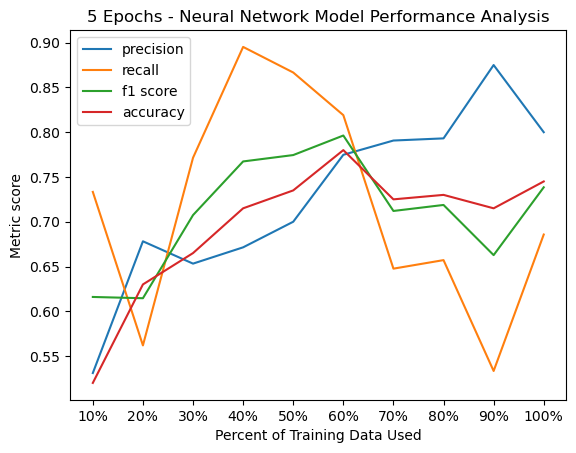

<Figure size 640x480 with 0 Axes>

In [10]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)

# graph for Binary, Count Vectorizer, 5 epochs
train_feats = [(x, y) for x,y in zip(X_train_CV_binary, y_train) ]
dev_feats = [(x, y) for x,y in zip(X_dev_CV_binary, y_dev) ]
sutils.create_training_graph(sutils.neural_net_metrics, train_feats, dev_feats, '5 Epochs - Neural Network', 'Neural_Network_CV_Binary_5Epochs_Graph.png', verbose=True, num_epochs=5)

0.1 of training data used
Epoch 1/10
5/5 [==============================] - 1s 11ms/step - loss: 0.7013 - accuracy: 0.5188
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6869 - accuracy: 0.5625
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.6754 - accuracy: 0.6562
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6639 - accuracy: 0.7375
Epoch 5/10
5/5 [==============================] - 0s 11ms/step - loss: 0.6534 - accuracy: 0.8250
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6430 - accuracy: 0.8438
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 0.6327 - accuracy: 0.9062
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6238 - accuracy: 0.9312
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6132 - accuracy: 0.9500
Epoch 10/10
7/7 [==============================] - 0s 3ms/step
0.6565656565656566 0.6190476190476191 0.

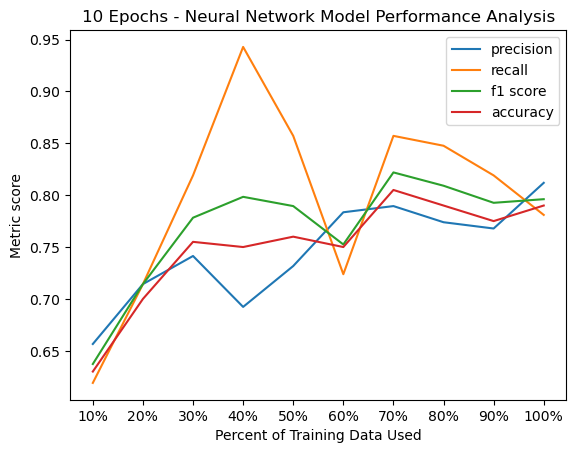

<Figure size 640x480 with 0 Axes>

In [11]:
# graph for Binary, Count Vectorizer, 10 epochs
train_feats = [(x, y) for x,y in zip(X_train_CV_binary, y_train) ]
dev_feats = [(x, y) for x,y in zip(X_dev_CV_binary, y_dev) ]
sutils.create_training_graph(sutils.neural_net_metrics, train_feats, dev_feats, '10 Epochs - Neural Network', 'Neural_Network_CV_Binary_10Epochs_Graph.png', verbose=True, num_epochs=10)

0.1 of training data used
Epoch 1/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6895 - accuracy: 0.5312
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.6783 - accuracy: 0.6313
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 0.6686 - accuracy: 0.7063
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.6587 - accuracy: 0.7750
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.6501 - accuracy: 0.8313
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.6397 - accuracy: 0.8188
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.6311 - accuracy: 0.8687
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 0.6212 - accuracy: 0.9187
Epoch 9/20
5/5 [==============================] - 0s 6ms/step - loss: 0.6128 - accuracy: 0.9438
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 0.6035 - accuracy: 0.9375
Epoch 11/2

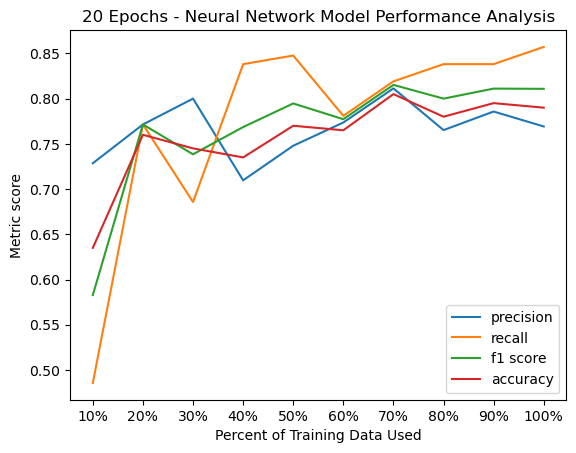

<Figure size 640x480 with 0 Axes>

In [12]:

# graph for Binary, Count Vectorizer, 20 epochs
train_feats = [(x, y) for x,y in zip(X_train_CV_binary, y_train) ]
dev_feats = [(x, y) for x,y in zip(X_dev_CV_binary, y_dev) ]
sutils.create_training_graph(sutils.neural_net_metrics, train_feats, dev_feats, '20 Epochs - Neural Network', 'Neural_Network_CV_Binary_20Epochs_Graph.png', verbose=True, num_epochs=20)


In [18]:
# get f1 score for Count Vectorizer, binary, 10 epochs
sutils.neural_net_metrics(X_train_CV_binary, y_train, X_dev_CV_binary, y_dev, num_epochs=10)[2]

Epoch 1/10
50/50 [==============================] - 1s 6ms/step - loss: 0.6843 - accuracy: 0.5838
Epoch 2/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6562 - accuracy: 0.7406
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6243 - accuracy: 0.8144
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 0.5891 - accuracy: 0.8300
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.5531 - accuracy: 0.8531
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 0.5177 - accuracy: 0.8600
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4856 - accuracy: 0.8756
Epoch 8/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.8813
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4289 - accuracy: 0.8863
Epoch 10/10
7/7 [==============================] - 0s 4ms/step


0.7843137254901961

In [19]:
# get f1 score for Count Vectorizer, multinomial, 10 epochs
sutils.neural_net_metrics(X_train_multi, y_train, X_dev_CV_multi, y_dev, num_epochs=10)[2]

Epoch 1/10
50/50 [==============================] - 1s 7ms/step - loss: 0.6700 - accuracy: 0.5994
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6194 - accuracy: 0.6781
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5961 - accuracy: 0.7000
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5320 - accuracy: 0.7725
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.5241 - accuracy: 0.7681
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4787 - accuracy: 0.8081
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4659 - accuracy: 0.8087
Epoch 8/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4296 - accuracy: 0.8250
Epoch 9/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4332 - accuracy: 0.8269
Epoch 10/10
7/7 [==============================] - 0s 3ms/step


0.7586206896551724

Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: 10
- multinomial features: 0.759
- binarized features: 0.784

#TODO: update f1 scores if we re-run notebook!! (results for NN are not stable)

Neural Network with binarized features had the best f1 score